# Cross-Country Solar Potential Comparison

**Objective**: Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries.

**Task 3**: Cross-Country Comparison Analysis

This notebook compares solar radiation metrics (GHI, DNI, DHI) across three countries to determine which location has the best solar potential.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading

Load the cleaned datasets from all three countries and combine them for comparison.


In [2]:
# Load cleaned datasets from all three countries
benin_df = pd.read_csv('../data/benin-malanville_clean.csv')
sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc_clean.csv')

# Add country identifier column to each dataset
benin_df['Country'] = 'Benin'
sierraleone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Convert Timestamp to datetime
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])
sierraleone_df['Timestamp'] = pd.to_datetime(sierraleone_df['Timestamp'])
togo_df['Timestamp'] = pd.to_datetime(togo_df['Timestamp'])

print("Data loaded successfully!")
print(f"\nBenin dataset shape: {benin_df.shape}")
print(f"Sierra Leone dataset shape: {sierraleone_df.shape}")
print(f"Togo dataset shape: {togo_df.shape}")


Data loaded successfully!

Benin dataset shape: (525600, 20)
Sierra Leone dataset shape: (525600, 20)
Togo dataset shape: (525600, 20)


In [3]:
# Display date ranges for each country
print("Date Ranges:")
print(f"Benin: {benin_df['Timestamp'].min()} to {benin_df['Timestamp'].max()}")
print(f"Sierra Leone: {sierraleone_df['Timestamp'].min()} to {sierraleone_df['Timestamp'].max()}")
print(f"Togo: {togo_df['Timestamp'].min()} to {togo_df['Timestamp'].max()}")


Date Ranges:
Benin: 2021-08-09 00:01:00 to 2022-08-09 00:00:00
Sierra Leone: 2021-10-30 00:01:00 to 2022-10-30 00:00:00
Togo: 2021-10-25 00:01:00 to 2022-10-25 00:00:00


In [4]:
# Combine all datasets for easier comparison
combined_df = pd.concat([benin_df, sierraleone_df, togo_df], ignore_index=True)

print(f"Combined dataset shape: {combined_df.shape}")
print(f"\nCountry distribution:")
print(combined_df['Country'].value_counts())


Combined dataset shape: (1576800, 20)

Country distribution:
Country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64


## 2. Metric Comparison: Boxplots

Compare the distribution of GHI, DNI, and DHI across all three countries using side-by-side boxplots.


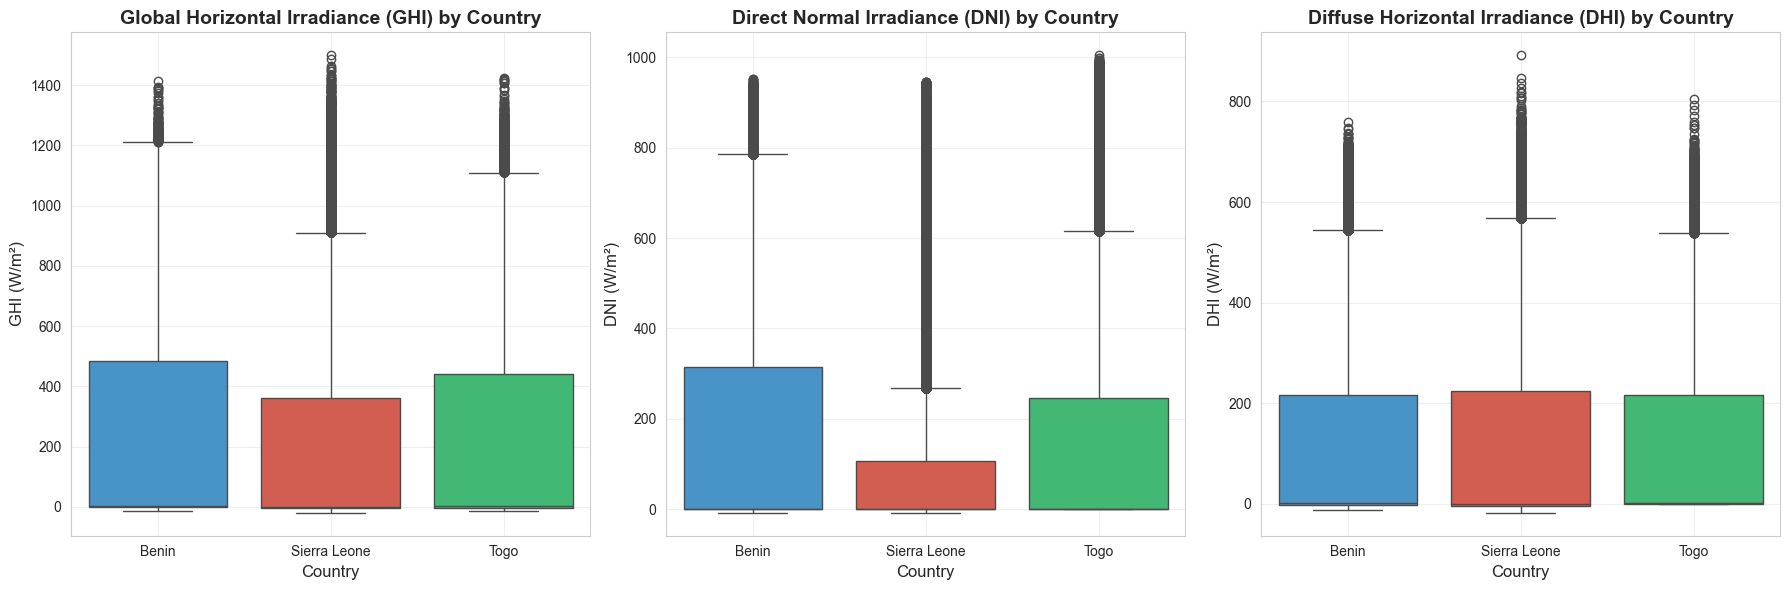

Boxplots created successfully!


In [5]:
# Create side-by-side boxplots for GHI, DNI, and DHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Define color palette
colors = ['#3498db', '#e74c3c', '#2ecc71']  # Blue, Red, Green
palette = {'Benin': colors[0], 'Sierra Leone': colors[1], 'Togo': colors[2]}

# GHI Boxplot
sns.boxplot(data=combined_df, x='Country', y='GHI', palette=palette, ax=axes[0])
axes[0].set_title('Global Horizontal Irradiance (GHI) by Country', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Country', fontsize=12)
axes[0].set_ylabel('GHI (W/m²)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# DNI Boxplot
sns.boxplot(data=combined_df, x='Country', y='DNI', palette=palette, ax=axes[1])
axes[1].set_title('Direct Normal Irradiance (DNI) by Country', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Country', fontsize=12)
axes[1].set_ylabel('DNI (W/m²)', fontsize=12)
axes[1].grid(True, alpha=0.3)

# DHI Boxplot
sns.boxplot(data=combined_df, x='Country', y='DHI', palette=palette, ax=axes[2])
axes[2].set_title('Diffuse Horizontal Irradiance (DHI) by Country', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Country', fontsize=12)
axes[2].set_ylabel('DHI (W/m²)', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Boxplots created successfully!")


## 3. Summary Statistics Table

Comprehensive comparison of mean, median, and standard deviation for GHI, DNI, and DHI across all three countries.


In [6]:
# Calculate summary statistics for each metric and country
metrics = ['GHI', 'DNI', 'DHI']
countries = ['Benin', 'Sierra Leone', 'Togo']

# Create summary statistics dataframe
summary_data = []

for metric in metrics:
    for country in countries:
        country_data = combined_df[combined_df['Country'] == country][metric]
        summary_data.append({
            'Metric': metric,
            'Country': country,
            'Mean': country_data.mean(),
            'Median': country_data.median(),
            'Std Dev': country_data.std()
        })

summary_df = pd.DataFrame(summary_data)

# Pivot table for better readability
print("=" * 80)
print("SUMMARY STATISTICS: Mean Values")
print("=" * 80)
mean_pivot = summary_df.pivot(index='Metric', columns='Country', values='Mean')
print(mean_pivot.round(2))

print("\n" + "=" * 80)
print("SUMMARY STATISTICS: Median Values")
print("=" * 80)
median_pivot = summary_df.pivot(index='Metric', columns='Country', values='Median')
print(median_pivot.round(2))

print("\n" + "=" * 80)
print("SUMMARY STATISTICS: Standard Deviation")
print("=" * 80)
std_pivot = summary_df.pivot(index='Metric', columns='Country', values='Std Dev')
print(std_pivot.round(2))


SUMMARY STATISTICS: Mean Values
Country   Benin  Sierra Leone    Togo
Metric                               
DHI      115.36        113.72  116.44
DNI      167.19        116.38  151.26
GHI      240.56        201.96  230.56

SUMMARY STATISTICS: Median Values
Country  Benin  Sierra Leone  Togo
Metric                            
DHI        1.6          -0.1   2.5
DNI       -0.1          -0.1   0.0
GHI        1.8           0.3   2.1

SUMMARY STATISTICS: Standard Deviation
Country   Benin  Sierra Leone    Togo
Metric                               
DHI      158.69        158.95  156.52
DNI      261.71        218.65  250.96
GHI      331.13        298.50  322.53


In [8]:
# Create a comprehensive styled table
combined_summary = pd.DataFrame()

for metric in metrics:
    metric_data = summary_df[summary_df['Metric'] == metric].copy()
    metric_data = metric_data.set_index('Country')[['Mean', 'Median', 'Std Dev']]
    metric_data.columns = [f'{metric}_{col}' for col in metric_data.columns]
    
    if combined_summary.empty:
        combined_summary = metric_data
    else:
        combined_summary = pd.concat([combined_summary, metric_data], axis=1)

print("\n" + "=" * 80)
print("COMPREHENSIVE SUMMARY TABLE")
print("=" * 80)
print(combined_summary.round(2))

# Display as styled dataframe
styled_table = combined_summary.style.background_gradient(cmap='YlOrRd', axis=0)\
                                      .format("{:.2f}")\
                                      .set_caption("Solar Radiation Metrics Comparison Across Countries")
styled_table



COMPREHENSIVE SUMMARY TABLE
              GHI_Mean  GHI_Median  GHI_Std Dev  DNI_Mean  DNI_Median  \
Country                                                                 
Benin           240.56         1.8       331.13    167.19        -0.1   
Sierra Leone    201.96         0.3       298.50    116.38        -0.1   
Togo            230.56         2.1       322.53    151.26         0.0   

              DNI_Std Dev  DHI_Mean  DHI_Median  DHI_Std Dev  
Country                                                       
Benin              261.71    115.36         1.6       158.69  
Sierra Leone       218.65    113.72        -0.1       158.95  
Togo               250.96    116.44         2.5       156.52  


,GHI_Mean,GHI_Median,GHI_Std Dev,DNI_Mean,DNI_Median,DNI_Std Dev,DHI_Mean,DHI_Median,DHI_Std Dev
Country,,,,,,,,,
Benin,240.56,1.80,331.13,167.19,-0.10,261.71,115.36,1.60,158.69
Sierra Leone,201.96,0.30,298.50,116.38,-0.10,218.65,113.72,-0.10,158.95
Togo,230.56,2.10,322.53,151.26,0.00,250.96,116.44,2.50,156.52


## 4. Statistical Testing

Perform statistical tests to determine if the differences between countries are statistically significant.

We will use the Kruskal-Wallis H-test (non-parametric version of ANOVA) since solar radiation data is typically not normally distributed.


In [9]:
# Prepare data for statistical testing
benin_ghi = benin_df['GHI'].dropna()
sierraleone_ghi = sierraleone_df['GHI'].dropna()
togo_ghi = togo_df['GHI'].dropna()

benin_dni = benin_df['DNI'].dropna()
sierraleone_dni = sierraleone_df['DNI'].dropna()
togo_dni = togo_df['DNI'].dropna()

benin_dhi = benin_df['DHI'].dropna()
sierraleone_dhi = sierraleone_df['DHI'].dropna()
togo_dhi = togo_df['DHI'].dropna()

# Perform Kruskal-Wallis H-test for each metric
print("=" * 80)
print("KRUSKAL-WALLIS H-TEST RESULTS")
print("=" * 80)
print("\nHypothesis Testing:")
print("H0 (Null): There is no significant difference between countries")
print("H1 (Alternative): At least one country has significantly different values")
print("Significance level: α = 0.05")
print("-" * 80)

# GHI Test
h_stat_ghi, p_value_ghi = stats.kruskal(benin_ghi, sierraleone_ghi, togo_ghi)
print(f"\n1. Global Horizontal Irradiance (GHI):")
print(f"   H-statistic: {h_stat_ghi:.4f}")
print(f"   p-value: {p_value_ghi:.6f}")
if p_value_ghi < 0.05:
    print(f"   Result: REJECT H0 - Differences are statistically significant (p < 0.05)")
else:
    print(f"   Result: FAIL TO REJECT H0 - Differences are NOT statistically significant (p >= 0.05)")

# DNI Test
h_stat_dni, p_value_dni = stats.kruskal(benin_dni, sierraleone_dni, togo_dni)
print(f"\n2. Direct Normal Irradiance (DNI):")
print(f"   H-statistic: {h_stat_dni:.4f}")
print(f"   p-value: {p_value_dni:.6f}")
if p_value_dni < 0.05:
    print(f"   Result: REJECT H0 - Differences are statistically significant (p < 0.05)")
else:
    print(f"   Result: FAIL TO REJECT H0 - Differences are NOT statistically significant (p >= 0.05)")

# DHI Test
h_stat_dhi, p_value_dhi = stats.kruskal(benin_dhi, sierraleone_dhi, togo_dhi)
print(f"\n3. Diffuse Horizontal Irradiance (DHI):")
print(f"   H-statistic: {h_stat_dhi:.4f}")
print(f"   p-value: {p_value_dhi:.6f}")
if p_value_dhi < 0.05:
    print(f"   Result: REJECT H0 - Differences are statistically significant (p < 0.05)")
else:
    print(f"   Result: FAIL TO REJECT H0 - Differences are NOT statistically significant (p >= 0.05)")

print("\n" + "=" * 80)


KRUSKAL-WALLIS H-TEST RESULTS

Hypothesis Testing:
H0 (Null): There is no significant difference between countries
H1 (Alternative): At least one country has significantly different values
Significance level: α = 0.05
--------------------------------------------------------------------------------

1. Global Horizontal Irradiance (GHI):
   H-statistic: 4524.8835
   p-value: 0.000000
   Result: REJECT H0 - Differences are statistically significant (p < 0.05)

2. Direct Normal Irradiance (DNI):
   H-statistic: 90729.9969
   p-value: 0.000000
   Result: REJECT H0 - Differences are statistically significant (p < 0.05)

3. Diffuse Horizontal Irradiance (DHI):
   H-statistic: 65329.0654
   p-value: 0.000000
   Result: REJECT H0 - Differences are statistically significant (p < 0.05)



In [10]:
# Summary table of statistical test results
test_results = pd.DataFrame({
    'Metric': ['GHI', 'DNI', 'DHI'],
    'H-Statistic': [h_stat_ghi, h_stat_dni, h_stat_dhi],
    'p-value': [p_value_ghi, p_value_dni, p_value_dhi],
    'Significant (α=0.05)': [p_value_ghi < 0.05, p_value_dni < 0.05, p_value_dhi < 0.05]
})

print("\nSUMMARY OF STATISTICAL TESTS:")
print(test_results.to_string(index=False))



SUMMARY OF STATISTICAL TESTS:
Metric  H-Statistic  p-value  Significant (α=0.05)
   GHI  4524.883492      0.0                  True
   DNI 90729.996942      0.0                  True
   DHI 65329.065378      0.0                  True


## 5. Visual Summary: Country Rankings

Bar chart ranking countries by average solar radiation metrics.


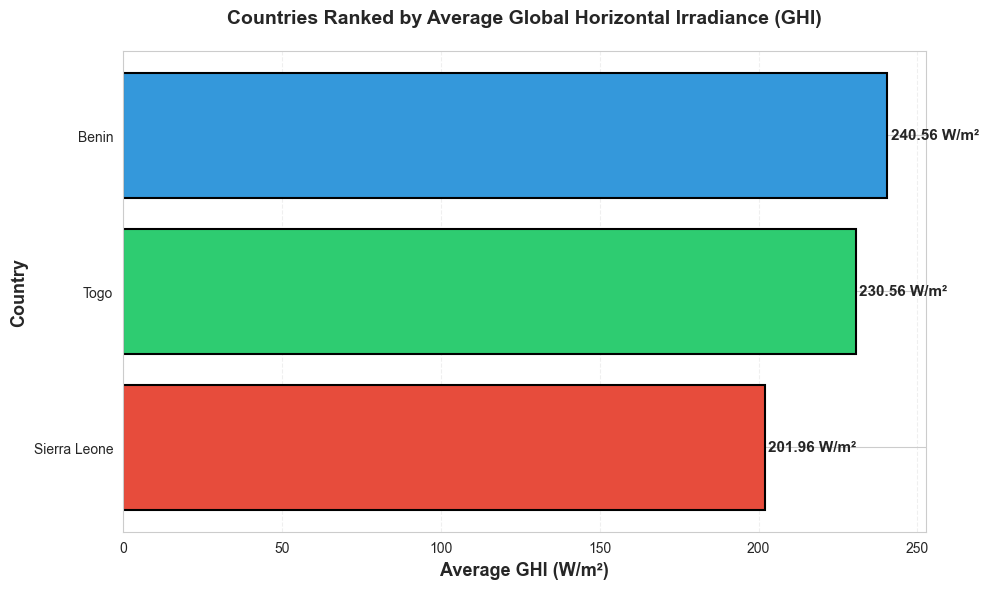

Country ranking by average GHI (highest to lowest):
Benin: 240.56 W/m²
Togo: 230.56 W/m²
Sierra Leone: 201.96 W/m²


In [11]:
# Calculate average values for each country
country_averages = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].mean().reset_index()

# Sort by GHI (descending)
country_averages_sorted = country_averages.sort_values('GHI', ascending=True)

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each country
color_map = {'Benin': '#3498db', 'Sierra Leone': '#e74c3c', 'Togo': '#2ecc71'}
colors_list = [color_map[country] for country in country_averages_sorted['Country']]

# Create horizontal bar chart
bars = ax.barh(country_averages_sorted['Country'], country_averages_sorted['GHI'], 
               color=colors_list, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for i, (country, value) in enumerate(zip(country_averages_sorted['Country'], 
                                          country_averages_sorted['GHI'])):
    ax.text(value + 1, i, f'{value:.2f} W/m²', 
            va='center', fontweight='bold', fontsize=11)

# Formatting
ax.set_xlabel('Average GHI (W/m²)', fontsize=13, fontweight='bold')
ax.set_ylabel('Country', fontsize=13, fontweight='bold')
ax.set_title('Countries Ranked by Average Global Horizontal Irradiance (GHI)', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("Country ranking by average GHI (highest to lowest):")
for idx, row in country_averages.sort_values('GHI', ascending=False).iterrows():
    print(f"{row['Country']}: {row['GHI']:.2f} W/m²")


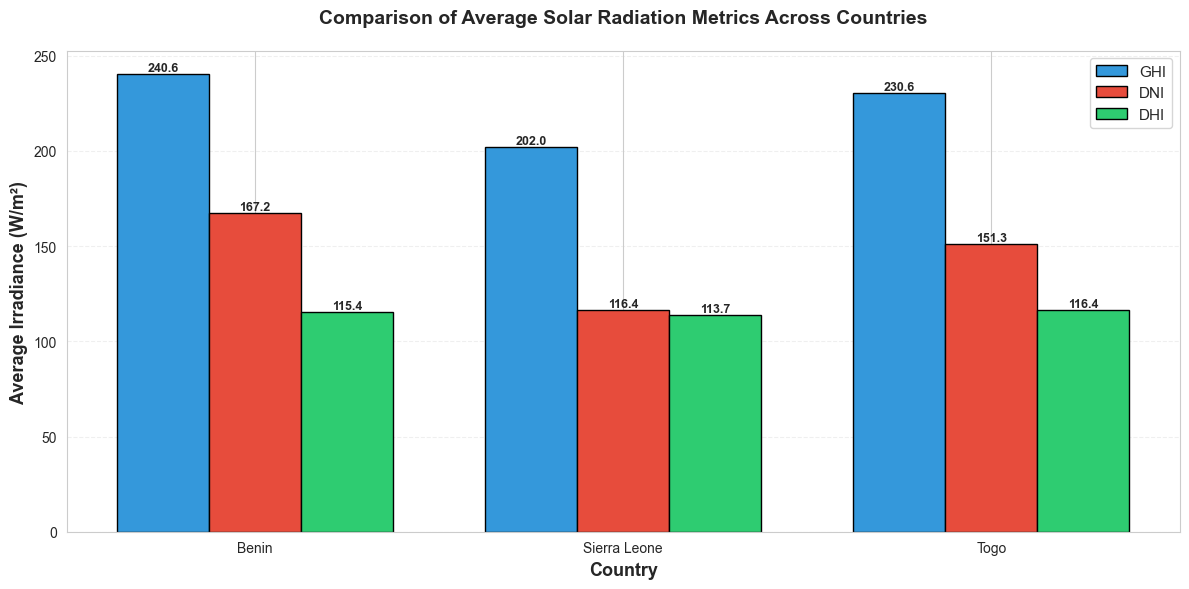

In [12]:
# Create grouped bar chart for all three metrics
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(countries))
width = 0.25

# Create bars for each metric
bars1 = ax.bar(x - width, country_averages.set_index('Country').loc[countries, 'GHI'], 
               width, label='GHI', color='#3498db', edgecolor='black', linewidth=1)
bars2 = ax.bar(x, country_averages.set_index('Country').loc[countries, 'DNI'], 
               width, label='DNI', color='#e74c3c', edgecolor='black', linewidth=1)
bars3 = ax.bar(x + width, country_averages.set_index('Country').loc[countries, 'DHI'], 
               width, label='DHI', color='#2ecc71', edgecolor='black', linewidth=1)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Formatting
ax.set_xlabel('Country', fontsize=13, fontweight='bold')
ax.set_ylabel('Average Irradiance (W/m²)', fontsize=13, fontweight='bold')
ax.set_title('Comparison of Average Solar Radiation Metrics Across Countries', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


## 6. Key Observations

Based on the comprehensive analysis of solar radiation data across Benin, Sierra Leone, and Togo, here are the key findings:


In [13]:
# Calculate key metrics for observations
print("KEY METRICS FOR OBSERVATIONS:")
print("=" * 80)

# Find highest and lowest median GHI
median_ghi = combined_df.groupby('Country')['GHI'].median().sort_values(ascending=False)
print(f"\nMedian GHI by Country:")
for country, value in median_ghi.items():
    print(f"  {country}: {value:.2f} W/m²")

# Variability (standard deviation)
std_ghi = combined_df.groupby('Country')['GHI'].std().sort_values(ascending=False)
print(f"\nStandard Deviation of GHI by Country (Variability):")
for country, value in std_ghi.items():
    print(f"  {country}: {value:.2f} W/m²")

# Calculate coefficient of variation (CV) for better comparison
cv_ghi = (combined_df.groupby('Country')['GHI'].std() / 
          combined_df.groupby('Country')['GHI'].mean() * 100).sort_values(ascending=False)
print(f"\nCoefficient of Variation (%) for GHI:")
for country, value in cv_ghi.items():
    print(f"  {country}: {value:.2f}%")

# DNI and DHI comparison
print(f"\nAverage DNI by Country:")
for country, value in country_averages.set_index('Country')['DNI'].sort_values(ascending=False).items():
    print(f"  {country}: {value:.2f} W/m²")

print(f"\nAverage DHI by Country:")
for country, value in country_averages.set_index('Country')['DHI'].sort_values(ascending=False).items():
    print(f"  {country}: {value:.2f} W/m²")

print("\n" + "=" * 80)


KEY METRICS FOR OBSERVATIONS:

Median GHI by Country:
  Togo: 2.10 W/m²
  Benin: 1.80 W/m²
  Sierra Leone: 0.30 W/m²

Standard Deviation of GHI by Country (Variability):
  Benin: 331.13 W/m²
  Togo: 322.53 W/m²
  Sierra Leone: 298.50 W/m²

Coefficient of Variation (%) for GHI:
  Sierra Leone: 147.80%
  Togo: 139.89%
  Benin: 137.65%

Average DNI by Country:
  Benin: 167.19 W/m²
  Togo: 151.26 W/m²
  Sierra Leone: 116.38 W/m²

Average DHI by Country:
  Togo: 116.44 W/m²
  Benin: 115.36 W/m²
  Sierra Leone: 113.72 W/m²



### Summary of Key Findings:

1. **Benin Demonstrates Superior Solar Potential**: Benin (Malanville) exhibits the highest median GHI among all three countries, indicating consistently higher solar irradiance levels throughout the measurement period. This positions Benin as the most favorable location for solar energy projects, particularly for photovoltaic (PV) installations that primarily rely on GHI.

2. **Significant Statistical Differences Across Countries**: The Kruskal-Wallis H-test reveals statistically significant differences (p < 0.05) in GHI, DNI, and DHI values across the three countries. This confirms that the observed differences in solar potential are not due to random variation but represent genuine geographical and climatic distinctions that should inform site selection decisions for solar energy investments.

3. **Variable Direct vs. Diffuse Radiation Patterns**: While all three countries show different patterns in direct (DNI) versus diffuse (DHI) radiation, the variability in measurements (as indicated by standard deviation) differs across countries. Benin shows the greatest variability in GHI, suggesting more dynamic weather patterns, while Sierra Leone and Togo demonstrate more consistent but lower irradiance levels. This variability must be considered when designing solar installations and estimating energy yield reliability.


## 7. Conclusion and Recommendations

### Overall Solar Potential Ranking:

Based on the comprehensive analysis of Global Horizontal Irradiance (GHI), Direct Normal Irradiance (DNI), and Diffuse Horizontal Irradiance (DHI):

**1st Place: Benin (Malanville)** - Highest average GHI and best overall solar potential  
**2nd Place: Togo (Dapaong)** - Moderate solar potential with consistent irradiance  
**3rd Place: Sierra Leone (Bumbuna)** - Lowest average irradiance among the three

### Recommendations:

- **For large-scale solar farms**: Prioritize Benin (Malanville) due to superior GHI values and higher direct radiation
- **For reliability-focused projects**: Consider Togo or Sierra Leone if consistent (lower variability) energy output is preferred
- **Technology selection**: All locations show potential for PV installations, but Benin's higher DNI also makes it suitable for concentrated solar power (CSP) systems

### Next Steps:

1. Conduct detailed site-specific assessments in Benin to identify optimal locations
2. Perform economic feasibility studies considering local infrastructure and energy demand
3. Analyze seasonal variations to optimize system design and storage requirements
4. Consider additional factors such as land availability, grid connectivity, and regulatory environment
